In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cho_pha_go_train
import warnings
warnings.filterwarnings("ignore")
model = cho_pha_go_train.AlphaGoZeroNet(5)
# breakpoint()
model.load('models/cho_pha_go_5x5.pt')

Model loaded from models/cho_pha_go_5x5.pt.


In [86]:

dic = {}
for k, v in model.losses.items():
    dic[k] = np.mean(v)

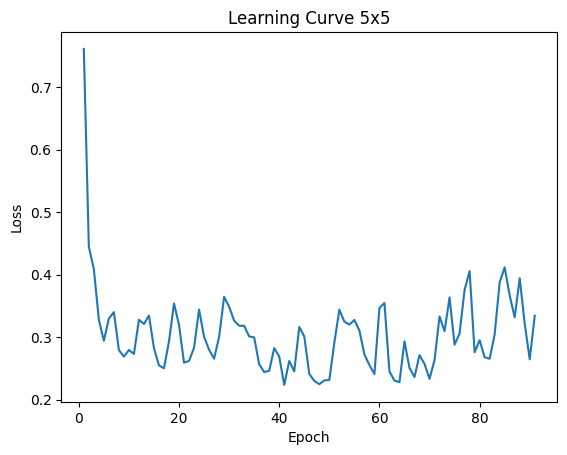

In [87]:
pd.Series(dic).sort_index().plot()
plt.title('Learning Curve 5x5')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# save image of the plot
plt.savefig('learning_curve_5x5.png')
plt.show()

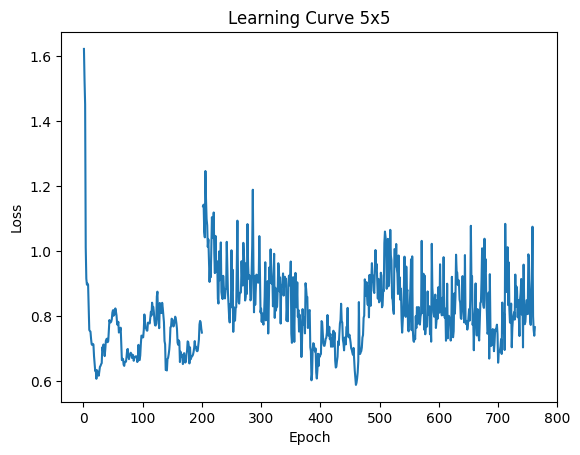

In [34]:
pd.Series(dic).sort_index().plot()
plt.title('Learning Curve 5x5')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# save image of the plot
plt.savefig('learning_curve_5x5.png')
plt.show()